
# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [38]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


Feito a leitura do df, irei criar uma cópia dele para melhor manipular na hora de fazer as crosstab. 

In [39]:
# Criar uma cópia do DataFrame 'df'
df_copy = df.copy()

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

Vamos lá, para iniciar vamos substituir as dummies de sex por 'homem' e 'mulher', sendo 0 masc e 1 fem. 

In [40]:
# Substituir 0 por 'masc' e 1 por 'fem' na coluna 'sex'
df_copy['sex'] = df_copy['sex'].replace({1: 'masc', 0: 'fem'})
df_copy['flag_doente'] = df_copy['flag_doente'].replace({0: 'saudável', 1: 'doente'})

In [41]:
def tabela_cruzada (df, variavel_independente, variavel_dependente):

    # Calcula a tabela cruzada com margens
    tab = pd.crosstab(df_copy[variavel_independente], df_copy[variavel_dependente], margins=True)
    
    # Calcula o percentual de doentes
    tab['percentual_doentes'] = tab['doente'] / tab['All']
    
    # Calcula a chance de ser doente
    tab['chance_ser_doente'] = tab['doente'] / tab['saudável']
    
    # Calcula a razão de chance (RC) em relação a todos os dados
    tab['RC_vs_All'] = tab['chance_ser_doente'] / tab.loc['All', 'chance_ser_doente']
    
    # Calcula o log da razão de chance (RC)
    tab['LOG: RC_vs_All'] = np.log(tab['RC_vs_All'])
    
    return tab

Agora que criamos a função, vamos testá-la com pelo menos três variáveis. A primeira, será a mesma já testada no exercício anterior, apenas para conferir se iremos obter os mesmos resultados. Vamos iniciar então pela variável 'sex':

In [42]:
resultado1 = tabela_cruzada(df_copy, 'sex', 'flag_doente')
resultado1

flag_doente,doente,saudável,All,percentual_doentes,chance_ser_doente,RC_vs_All,LOG: RC_vs_All
sex,,,,,,,
fem,25,72,97,0.257732,0.347222,0.409672,-0.892398
masc,114,92,206,0.553398,1.239130,1.461996,0.379802
All,139,164,303,0.458746,0.847561,1.000000,0.000000


Esse primeiro resultado é bastante discriminatório, pois realmente há uma diferença enorme nas estatísticas para homens e mulheres, aqui podemos claramente perceber que o sexo feminino tem uma chance muito maior de possuir doenças cardíacas.

Agora vamos para a análise da segunda varável, 'exang'. Essa variável se refere à angina induzida por exercício, ou seja, uma forte dor toráxica ao realizar exercícios, temos 1 para sim e 0 para não, para facilitar essa observação, faremos a troca no nosso df e em seguida aplicaremos a função para obter nosso dataframe com as estatísticas desejadas:

In [43]:
df_copy['exang'] = df_copy['exang'].replace({1: 'sim', 0: 'não'})

In [44]:
resultado2 = tabela_cruzada(df_copy, 'exang', 'flag_doente')
resultado2

flag_doente,doente,saudável,All,percentual_doentes,chance_ser_doente,RC_vs_All,LOG: RC_vs_All
exang,,,,,,,
não,63,141,204,0.308824,0.446809,0.527170,-0.640233
sim,76,23,99,0.767677,3.304348,3.898655,1.360632
All,139,164,303,0.458746,0.847561,1.000000,0.000000


Obtemos aqui, mais uma variável bastante discriminatória, o que faz total sentido. Dos que sentem fortes dores toráxicas ao fazer exercícios, 76% apresenta doença cardiáca e dos que não sentem, apenas 30% apresenta. Então temos aqui um ótimo indicador. 

Agora, vamos analisar o efeito da variável 'restecg', variável referente aos resultados dos eletrocardiogramas, aonde temos 0 para normal, 1 para anomalias e 2 para hipertrofia provável ou definitiva.

In [45]:
df_copy['restecg'] = df_copy['restecg'].replace({ 0.0: 'normal', 1.0: 'anormal', 2.0:'hipertrofia prov'})

In [46]:
resultado3 = tabela_cruzada(df_copy, 'restecg', 'flag_doente')
resultado3

flag_doente,doente,saudável,All,percentual_doentes,chance_ser_doente,RC_vs_All,LOG: RC_vs_All
restecg,,,,,,,
anormal,3,1,4,0.750000,3.000000,3.539568,1.264005
hipertrofia prov,80,68,148,0.540541,1.176471,1.388066,0.327911
normal,56,95,151,0.370861,0.589474,0.695494,-0.363133
All,139,164,303,0.458746,0.847561,1.000000,0.000000


Bom, como é de se esperar, pessoas com o eletrocardiograma anormal tem uma chance alta de ser doente cardiovascular. Enquanto que pessoas com o eletro normal, tem chance mais baixa. Já para as pessoas que tem ou tem provavel hipertrofia, 54% tem realmente alguma doença cardíaca. Então essa variável é discriminatória levando em conta apenas as classes normal e anormal.

A próxima variável que iremos analisar é referente ao percentual de açucar no sangue em jejum, temos duas métricas, 1 para maior que 120 e 0 para menor. 

In [47]:
df_copy['fbs'] = df_copy['fbs'].replace({ 0: 'açucar<120', 1.0: 'açucar>120'})

In [48]:
resultado4 = tabela_cruzada(df_copy, 'fbs', 'flag_doente')
resultado4

flag_doente,doente,saudável,All,percentual_doentes,chance_ser_doente,RC_vs_All,LOG: RC_vs_All
fbs,,,,,,,
açucar<120,117,141,258,0.453488,0.829787,0.979030,-0.021193
açucar>120,22,23,45,0.488889,0.956522,1.128558,0.120941
All,139,164,303,0.458746,0.847561,1.000000,0.000000


Aqui podemos perceber que a chance de ser doente cardiovascular é maior para aqueles que possuem o açucar no sangue mais elevado, entretanto, não vemos aqui uma diferença gritante e, portanto, nem potencial discriminatório. 

Analisando os dataframes obtidos acima, as variáveis que tem maior potencial discriminatório são sex e exang. 

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [49]:
def tabela_cruzada_categorias(df, variavel_independente, variavel_dependente, num_grupos=5):

    
    # Categoriza a variável independente em grupos
    df_copy[variavel_independente] = pd.cut(df[variavel_independente], bins=num_grupos)
    
    # Calcula a tabela cruzada com margens
    tab = pd.crosstab(df_copy[variavel_independente], df_copy[variavel_dependente], margins=True)

    
    # Calcula o percentual de doentes
    tab['percentual_doentes'] = tab['doente'] / tab['All']
    
    # Calcula a chance de ser doente
    tab['chance_ser_doente'] = tab['doente'] / tab['saudável']
    
    # Calcula a razão de chances (RC) em relação a todos os dados
    tab['RC_vs_All'] = tab['chance_ser_doente'] / tab.loc['All', 'chance_ser_doente']
    
    # Calcula o log da razão de chances (RC)
    tab['LOG: RC_vs_All'] = np.log(tab['RC_vs_All'])
    
    return tab

Criada a função pedida, vamos testá-la com a variável idade e verificar se os cortes ficam iguais aos do exercício anterior:

In [50]:
resultado01 = tabela_cruzada_categorias(df_copy, 'age', 'flag_doente')
resultado01

flag_doente,doente,saudável,All,percentual_doentes,chance_ser_doente,RC_vs_All,LOG: RC_vs_All
age,,,,,,,
"(28.952, 38.6]",3,8,11,0.272727,0.375000,0.442446,-0.815437
"(38.6, 48.2]",21,50,71,0.295775,0.420000,0.495540,-0.702108
"(48.2, 57.8]",41,56,97,0.422680,0.732143,0.863823,-0.146387
"(57.8, 67.4]",67,40,107,0.626168,1.675000,1.976259,0.681206
"(67.4, 77.0]",7,10,17,0.411765,0.700000,0.825899,-0.191282
All,139,164,303,0.458746,0.847561,1.000000,0.000000


Obtivemos a mesma tabela do exercício anterior, o que mostra que a adição do pd.cut na nossa função deu certo! Aqui podemos perceber que as chances de ser doente são maiores a partir dos 48.2 anos. Agora vamos analisar a variável independente 'thalach'que se refere à frequencia cardiáca máxima alcançada. 

In [51]:
resultado02 = tabela_cruzada_categorias(df_copy, 'thalach', 'flag_doente', num_grupos=4)
resultado02

flag_doente,doente,saudável,All,percentual_doentes,chance_ser_doente,RC_vs_All,LOG: RC_vs_All
thalach,,,,,,,
"(70.869, 103.75]",9,1,10,0.900000,9.000000,10.618705,2.362617
"(103.75, 136.5]",50,19,69,0.724638,2.631579,3.104885,1.132977
"(136.5, 169.25]",70,92,162,0.432099,0.760870,0.897717,-0.107901
"(169.25, 202.0]",10,52,62,0.161290,0.192308,0.226895,-1.483266
All,139,164,303,0.458746,0.847561,1.000000,0.000000


Aqui podemos perceber que quanto menores as frequências máximas, maiores são as chances de ser doente, sendo uma variável com um potencial bastante discriminatório, visto que aqueles que se encaixam em frequencia máxima entre 70 e 103 tem chances altíssimas de serem doentes e um percentual de 90% desses são doentes. 

Agora vamos analisar mais uma variável contínua, 'trestbps' que se refere à pressão sanguínea em repouso. 

In [52]:
resultado03 = tabela_cruzada_categorias(df_copy, 'trestbps', 'flag_doente', num_grupos=4)
resultado03

flag_doente,doente,saudável,All,percentual_doentes,chance_ser_doente,RC_vs_All,LOG: RC_vs_All
trestbps,,,,,,,
"(93.894, 120.5]",37,60,97,0.381443,0.616667,0.727578,-0.318034
"(120.5, 147.0]",71,81,152,0.467105,0.876543,1.034195,0.033623
"(147.0, 173.5]",25,21,46,0.543478,1.190476,1.404591,0.339746
"(173.5, 200.0]",6,2,8,0.750000,3.000000,3.539568,1.264005
All,139,164,303,0.458746,0.847561,1.000000,0.000000


Essa variável também parece ser discriminatória, visto que quanto maior a pressão sanguínia, maior a chance de ser doente. Agora vamos analisar a variável 'chol: colesterol sérico em mg/dl':

In [53]:
resultado04 = tabela_cruzada_categorias(df_copy, 'chol', 'flag_doente', num_grupos=4)
resultado04

C:\Users\chaik\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


flag_doente,doente,saudável,All,percentual_doentes,chance_ser_doente,RC_vs_All,LOG: RC_vs_All
chol,,,,,,,
"(125.562, 235.5]",55,84,139,0.395683,0.654762,0.772525,-0.258091
"(235.5, 345.0]",81,75,156,0.519231,1.080000,1.274245,0.242354
"(345.0, 454.5]",3,4,7,0.428571,0.750000,0.884892,-0.122290
"(454.5, 564.0]",0,1,1,0.000000,0.000000,0.000000,-inf
All,139,164,303,0.458746,0.847561,1.000000,0.000000


Aqui não percebo um forte potencial discriminatório. Portanto, as preferidas aqui para criação de um modelo de regressão são 'age', 'thalach' e 'trestbps'. 

Para facilitar a construção dos modelos de regressão, farei alguns ajustes no data frame original:

In [54]:
df['sex'] = df['sex'].replace({1: 'masc', 0: 'fem'})

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

Primeiro modelo contendo as variáveis independentes sex + cp + trestbps:

In [55]:
reglog1 = smf.logit("flag_doente ~ C(sex) + C(cp) + trestbps",data=df).fit() 
reglog1.summary()

Optimization terminated successfully.
         Current function value: 0.493233
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.2849
Time:                        17:12:32   Log-Likelihood:                -149.45
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.908e-24
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.9260      1.371     -4.323      0.000      -8.613      -3.240
C(sex)[T.masc]     1.6297      0.340      4.794      0.000       0.963       2.296
C(cp)[T.2.0]      -0.1907      0.621     -0.307      0.759      -1.409       1.027
C(cp)[T.3.0]       0.0065      0.559      0.012      0.991      -1.089       1.102
C(cp)[T.4.0]       2.4260      0.539      4.501      0.000       1.370       3.482
trestbps           0.0259      0.008      3.114      0.002       0.010       0.042
==================================================================================
"""

De acordo com o p_value da nossa regressão, temos como variáveis significativas apenas uma das caselas do cp e ademais, temos a variável sex e trestbps (pressão sanguínea) como muito significativas. Acredito portanto, que podemos retirar a variável cp da nossa análise, claro, quando verificada no mesmo cenário que sex e trestps. Vamos tentar criar a regressão apenas com ela para ver o que acontece:

In [56]:
reglog1_1 = smf.logit("flag_doente ~ C(cp)",data=df).fit() 
reglog1.summary()

Optimization terminated successfully.
         Current function value: 0.547631
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.2849
Time:                        17:12:33   Log-Likelihood:                -149.45
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.908e-24
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.9260      1.371     -4.323      0.000      -8.613      -3.240
C(sex)[T.masc]     1.6297      0.340      4.794      0.000       0.963       2.296
C(cp)[T.2.0]      -0.1907      0.621     -0.307      0.759      -1.409       1.027
C(cp)[T.3.0]       0.0065      0.559      0.012      0.991      -1.089       1.102
C(cp)[T.4.0]       2.4260      0.539      4.501      0.000       1.370       3.482
trestbps           0.0259      0.008      3.114      0.002       0.010       0.042
==================================================================================
"""

Temos casela 1 e 4 como bastante signficativas, portanto, temos sim aqui um potencial discriminatório, vamos mantê-la na regressão anterior. Agora, vamos para o próximo modelo de regressão, nele avaliamos a variável age:

In [57]:
reglog2 = smf.logit("flag_doente ~ age",data=df).fit() 
reglog2.summary()

Optimization terminated successfully.
         Current function value: 0.664250
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 May 2024   Pseudo R-squ.:                 0.03696
Time:                        17:12:33   Log-Likelihood:                -201.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 8.487e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0059      0.759     -3.960      0.000      -4.494      -1.518
age            0.0520      0.014      3.803      0.000       0.025       0.079
==============================================================================
"""

Temos aqui mais uma variável muito importante. Agora vamos juntar todas em apenas um modelo para depois avaliá-lo:

In [58]:
reglog3 = smf.logit("flag_doente ~ C(sex) + C(cp) + trestbps + age",data=df).fit()
reglog3.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.3097
Time:                        17:12:34   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -8.3407      1.621     -5.145      0.000     -11.518      -5.163
C(sex)[T.masc]     1.8094      0.353      5.130      0.000       1.118       2.501
C(cp)[T.2.0]      -0.0617      0.636     -0.097      0.923      -1.309       1.186
C(cp)[T.3.0]       0.0715      0.573      0.125      0.901      -1.051       1.194
C(cp)[T.4.0]       2.4789      0.553      4.485      0.000       1.396       3.562
trestbps           0.0193      0.009      2.261      0.024       0.003       0.036
age                0.0567      0.018      3.120      0.002       0.021       0.092
==================================================================================
"""

Em relação às demais variáveis, podemos ver que age, assim como trestbps perdem um pouco da sua significância, mas é muito pouco mesmo e as duas continuam muito importantes para o modelo. Vamos agora avaliá-lo.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

Inicialmente vamos explorar um pouco os dados da nossa regressão:

In [59]:
reglog3.params

Intercept        -8.340715
C(sex)[T.masc]    1.809378
C(cp)[T.2.0]     -0.061711
C(cp)[T.3.0]      0.071482
C(cp)[T.4.0]      2.478856
trestbps          0.019274
age               0.056652
dtype: float64

Agora, com base nos dados acima, vamos calcular a chance de ser doente de um homem assintomático. Para isso, faremos o calculo do logarítmo do exponencial do eta. O eta se calcula através da soma do coef do intercepto, com o coef do sex masculino com o coef do assintomático. Feito isso, calcularemos também a probabilidade de ser doente.

In [60]:
eta = (-8.340715) + 1.809378 + 2.478856
chance = np.exp(eta)
prob = 1/(1+np.exp(-eta))
print(chance)
prob

0.01737920330419895


0.017082326086237606

Tanto a chance quanto a probabilidade de um homem assintomático ser doente é muito baixa. 

Agora para perceber como esses dados se comportariam caso fosse uma mulher assintomática, basta fazer o inverso do calcúlo acima:

In [61]:
print(1/chance)
1/prob

57.540036933591324


58.540036933591324

Podemos ver aqui que ambos aumentam bastante para o caso da pessoa analisada ser do sexo feminino. 

A chance de ser doente aumenta 0.019274 no loggito para cada trepstbps aumentado, vamos ver se aumentarmos 10:    

In [62]:
10*0.019274

0.19274

Agora que exploramos um pouco nosso modelo de regressão relog3, no qual colocamos todas as variáveis independentes solicitadas, vamos criar no nosso df uma coluna a mais para o predito desse modelo:

In [63]:
df['predito'] = reglog3.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,masc,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.458229
1,67.0,masc,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.944123
2,67.0,masc,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.886566
3,37.0,masc,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.134929
4,41.0,fem,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.027278


Agora iremos avaliar a calibragem, para isso, vamos quebrar a nossa variável 'predito' em 5 grupos/categorias, utilizando pd.cut:

In [64]:
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop') #diviviu em 5 grupos
cat_pred.value_counts().sort_index() #ordenar os grupos

(0.0131, 0.143]    62
(0.143, 0.287]     59
(0.287, 0.586]     62
(0.586, 0.822]     59
(0.822, 0.944]     61
Name: predito, dtype: int64

Feito isso, vamos criar uma variável que receba o data frame dividido desta forma, para isso, utilizamos um groupby:

In [65]:
group_reg = df.groupby(cat_pred) 
group_reg

Agora, vamos criar uma variável que adquira apenas a contagem dos flag_doente do group_reg, recebendo como indice as cinco categorias criadas através do predito:

In [66]:
calibre = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
calibre

,contagem
predito,
"(0.0131, 0.143]",62
"(0.143, 0.287]",59
"(0.287, 0.586]",62
"(0.586, 0.822]",59
"(0.822, 0.944]",61


Ao lado de contagem, vamos adicionar a média do predito:

In [67]:
calibre['predito'] = group_reg['predito'].mean()
calibre

,contagem,predito
predito,,
"(0.0131, 0.143]",62,0.072008
"(0.143, 0.287]",59,0.209626
"(0.287, 0.586]",62,0.435175
"(0.586, 0.822]",59,0.708861
"(0.822, 0.944]",61,0.874819


Bom, podemos observar no df acima: o índice, que é o agrupamento dos preditos (porcentagem de flag_doente) e a contagem de pessoas que se encaixam em cada categoria. Podemos ver acima em 'predito' que é a média de cada categoria, que algumas porcentagens são bem parecidas, mas agora, de fato vamos adicionar ainda à essse df a real porcentageem de doentes e ver se os valores da previsão são parecidos com os valores reais:

Quando pedimos a média de valores 0 e 1, como é o caso de flag_doente, ele devolve a taxa de doentes do grupo no caso:

In [68]:
calibre['pct_doente'] = group_reg['flag_doente'].mean()
calibre

,contagem,predito,pct_doente
predito,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


De acordo com o DF acima, temos uma previsão muito boa, pois o predito realmente se parece muito com o percentual real de doentes.

Agora vamos plotar um gráfico de linhas, no mesmo gráfico vamos plotar o percentual de doentes e o percentual predito. 

Text(0.5, 0, 'Grupo')

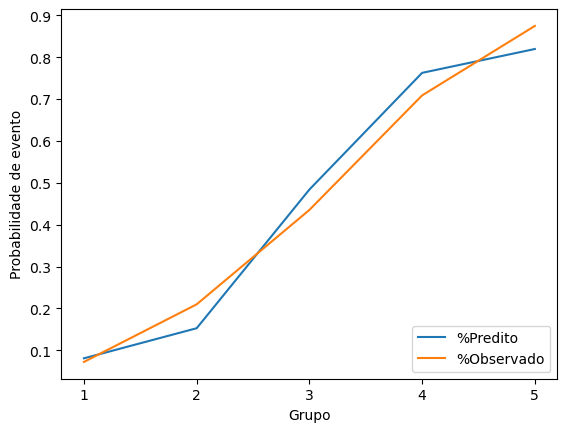

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = calibre['pct_doente'].plot(label='%Predito')
ax = calibre['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')


Visualmente, temos um bom encaixe no nosso modelo. 

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

Agora chegou a hora de avaliar nosso modelo, para isso utilizaremos:

Acurácia: mede a proporção de previsões corretas feitas por um modelo em relação ao total de previsões.
Gini: Usado para medir a capacidade discriminativa de um modelo, indicando quão bem ele separa as classes.
KS: Usado para medir a diferença entre as distribuições cumulativas das previsões positivas e negativas. O valor KS é o maior valor dessa diferença e pode ser interpretado como a capacidade do modelo de discriminar entre as duas classes.

In [77]:
from sklearn import metrics
from scipy.stats import ks_2samp

#ACURÁCIA
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#GINI
gini = 2*auc_ -1

#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}%  \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.54%
KS: 59.30%  
GINI: 70.39%


Aqui obtivemos uma boa acurácia, indicando que nosso modelo acertou em quase 80% das vezes. Num geral, aparentemente temos um bom modelo, mas vamos tentar melhorá-lo. 

6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

Vamos fazer uma nova tentiva de modelo, será nomeado reglog4, uma das variáveis pertinentes de ser adicionada, de acordo com nossa análise inicial é a 'exang' que 

In [73]:
reglog4 = smf.logit("flag_doente ~  age + thalach + trestbps + C(sex) + exang",data=df).fit()
reglog4.summary()

Optimization terminated successfully.
         Current function value: 0.496439
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.2803
Time:                        17:14:15   Log-Likelihood:                -150.42
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.266e-23
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.8888      1.907     -0.466      0.641      -4.627       2.849
C(sex)[T.masc]     1.5217      0.329      4.622      0.000       0.876       2.167
age                0.0286      0.018      1.559      0.119      -0.007       0.065
thalach           -0.0328      0.008     -4.231      0.000      -0.048      -0.018
trestbps           0.0190      0.009      2.220      0.026       0.002       0.036
exang              1.5467      0.321      4.824      0.000       0.918       2.175
==================================================================================
"""

De acordo com o nosso modelo, a única variável que não faz tanto sentido em vista das demais é age, portanto iremos removê-la e então testar a acurácia desse novo modelo que será nomeado de reglog5. Excluiremos também trestbps pois ao deixá-lo no modelo após remover age, ele fica com p-value de 6%.

In [81]:
reglog5 = smf.logit("flag_doente ~  thalach +  C(sex) + exang",data=df).fit()
reglog5.summary()

Optimization terminated successfully.
         Current function value: 0.513627
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            3
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.2553
Time:                        17:19:32   Log-Likelihood:                -155.63
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 5.562e-23
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8805      1.076      3.608      0.000       1.773       5.988
C(sex)[T.masc]     1.3395      0.312      4.292      0.000       0.728       1.951
thalach           -0.0364      0.007     -5.156      0.000      -0.050      -0.023
exang              1.5345      0.313      4.899      0.000       0.921       2.148
==================================================================================
"""

Para agilizar a nossa calibragem, vamos apenas repetir os passos feitos acima. 

In [84]:
df['predito'] = reglog5.predict(df)
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop') #diviviu em 5 grupos
cat_pred.value_counts().sort_index() #ordenar os grupos
group_reg = df.groupby(cat_pred) 
calibre = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
calibre['predito'] = group_reg['predito'].mean()
calibre['pct_doente'] = group_reg['flag_doente'].mean()
calibre

,contagem,predito,pct_doente
predito,,,
"(0.0415, 0.18]",61,0.118704,0.131148
"(0.18, 0.334]",60,0.256076,0.250000
"(0.334, 0.485]",61,0.402944,0.344262
"(0.485, 0.802]",60,0.627050,0.683333
"(0.802, 0.972]",61,0.888392,0.885246


Aqui também obtivemos valores bons, mas talvez não tão bons quanto os do modelo anterior. Vamos plotar o gráfico:

Text(0.5, 0, 'Grupo')

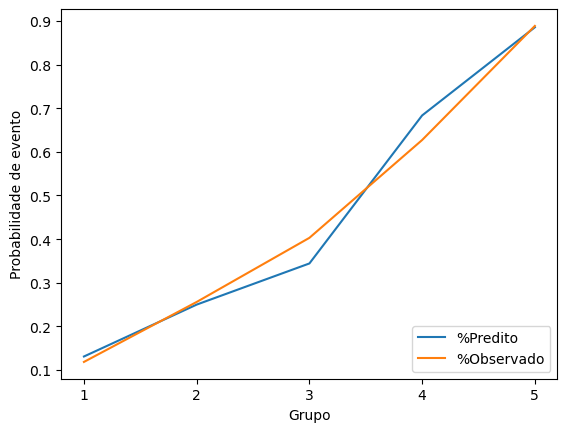

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = calibre['pct_doente'].plot(label='%Predito')
ax = calibre['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

Para tirarmos a dúvida, vamos calcular as métricas de acurácia:

In [86]:
#ACURÁCIA
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#GINI
gini = 2*auc_ -1

#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}%  \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 76.90%
KS: 53.49%  
GINI: 64.66%


Aqui também obtivemos um modelo bom, mas o anterior, sugerido pelo exercício é ainda melhor.